# Load STUFF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns

# PyMC 4.0 imports
import pymc as pm
import aesara.tensor as at 
import aesara
import arviz as az
import pymc.sampling_jax
import pytensor.tensor as pt
import pytensor

import sys
sys.path.append('../')

from scipy import stats

import os

from funciones.opencube2 import opencube2
from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges
from funciones.modelcube import modelmag,modelmagf,modelmag2


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pymc/sampling/jax.py:39: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


# load AR

In [2]:
with open('ARS.txt') as f:
    mylist = f.read().splitlines() 

10132-----------------------------------------------------
133 123 33
b'21-Sep-2002 22:23:01.298' b'24-Sep-2002 03:11:01.344'
75 84


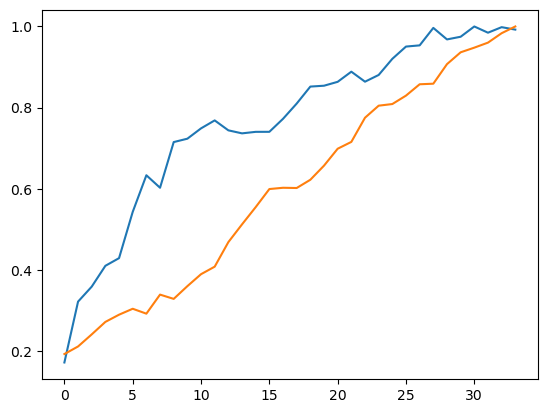

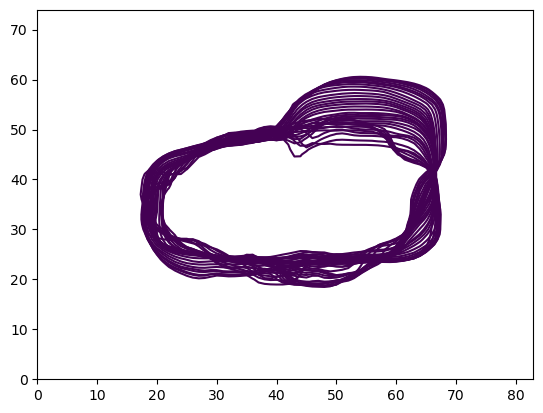

10323-----------------------------------------------------
155 193 68
b'27-Mar-2003 14:24:00.501' b'1-Apr-2003 03:12:00.557'
96 159


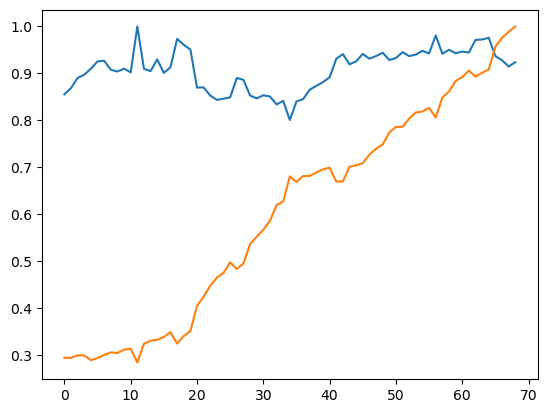

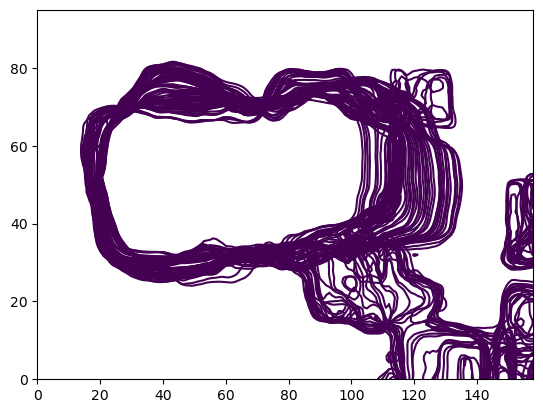

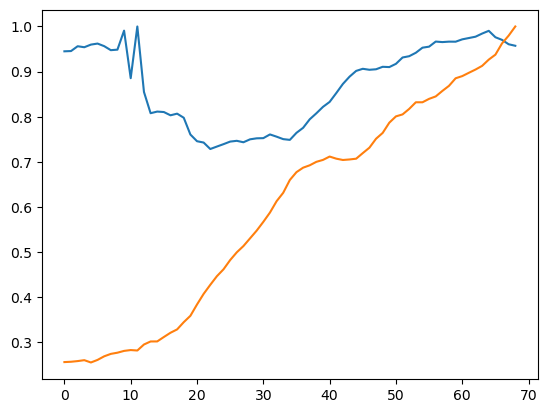

10344-----------------------------------------------------
231 171 68
b'25-Apr-2003 16:03:00.390' b'30-Apr-2003 04:47:00.310'
73 119


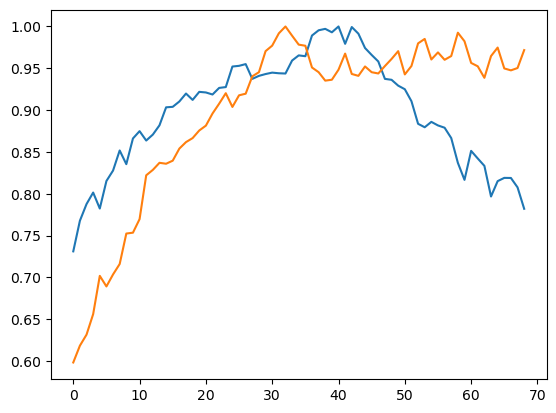

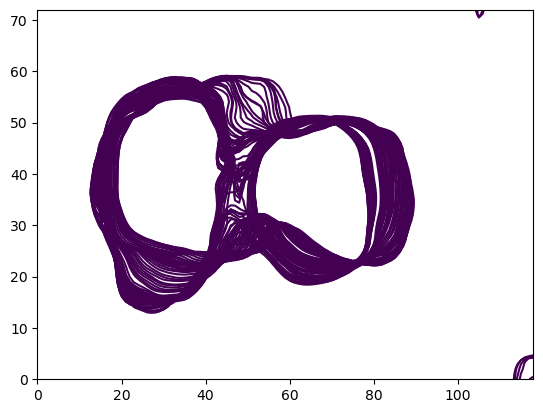

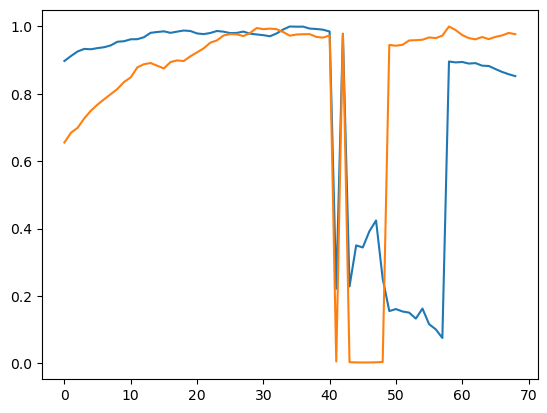

10381-----------------------------------------------------
145 137 57
b'9-Jun-2003 22:22:59.390' b'13-Jun-2003 17:34:59.340'
70 88


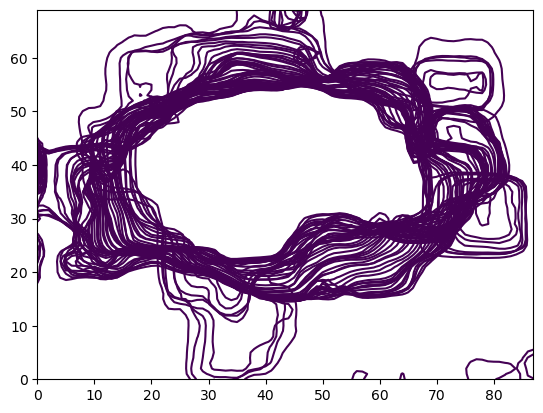

10569-----------------------------------------------------
96 119 68
b'4-Mar-2004 19:15:03.230' b'9-Mar-2004 08:03:03.330'
71 103


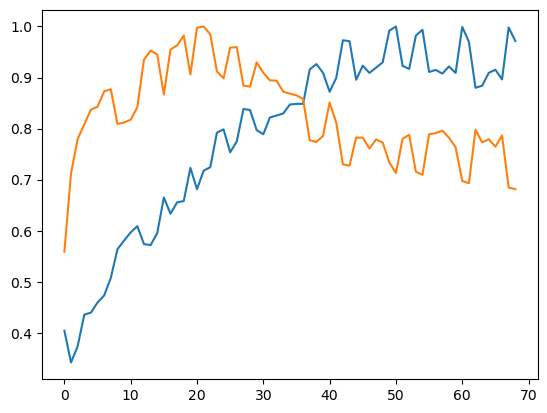

10879-----------------------------------------------------
143 151 65
b'1-May-2006 11:11:01.530' b'5-May-2006 19:11:01.450'
71 96


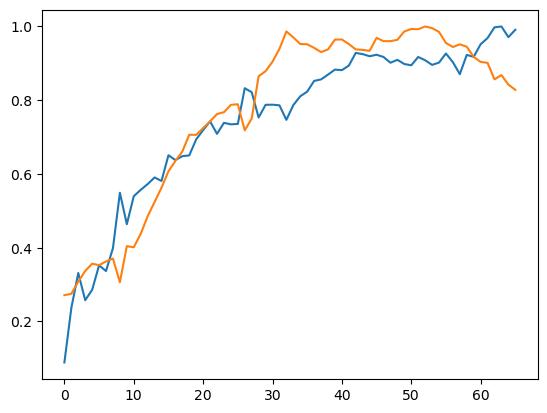

/tmp/ipykernel_10575/3926840095.py:41: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(mapi,levels=[np.max(mapi)*0.12]) #setting threshold to 12%


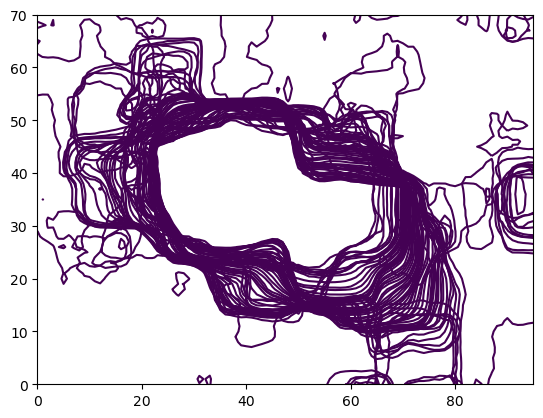

10900-----------------------------------------------------
163 191 68
b'15-Jul-2006 17:36:01.630' b'20-Jul-2006 06:23:01.750'
91 141


10971-----------------------------------------------------
151 169 56
b'28-Sep-2007 00:03:02.040' b'1-Oct-2007 17:36:01.940'
57 86


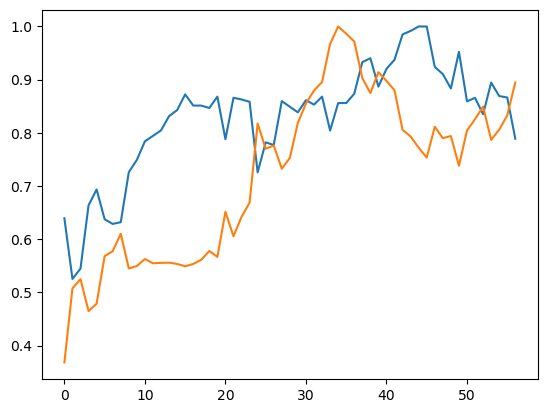

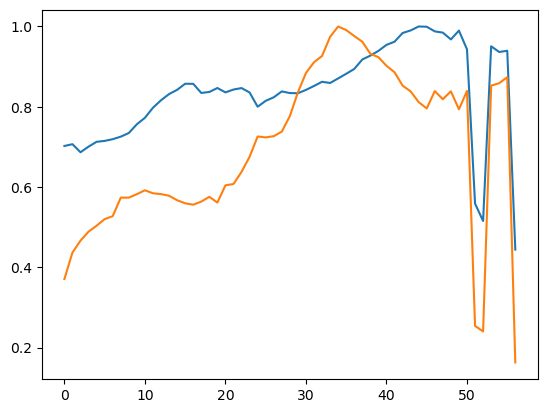

11024-----------------------------------------------------
137 157 48
b'4-Jul-2009 00:00:02.090' b'7-Jul-2009 04:48:02.170'
103 125


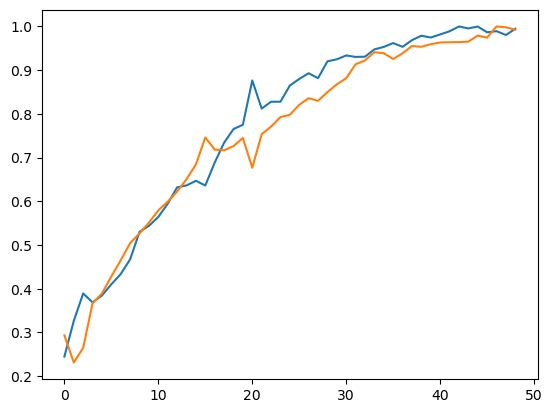

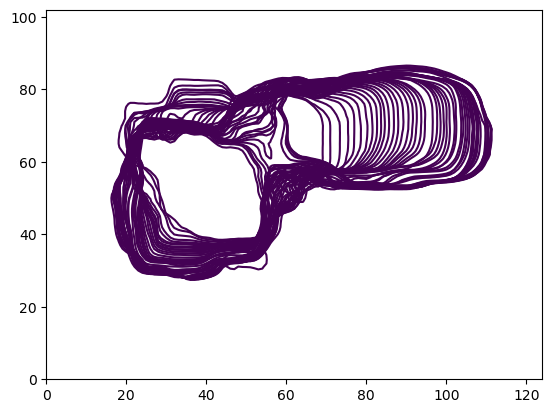

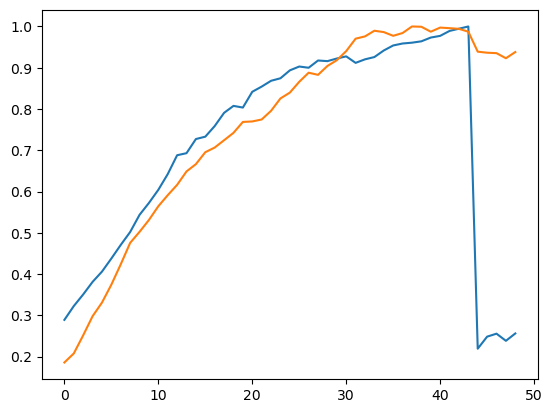

11027-----------------------------------------------------
147 185 69
b'23-Sep-2009 00:03:01.680' b'27-Sep-2009 14:24:01.550'
90 114


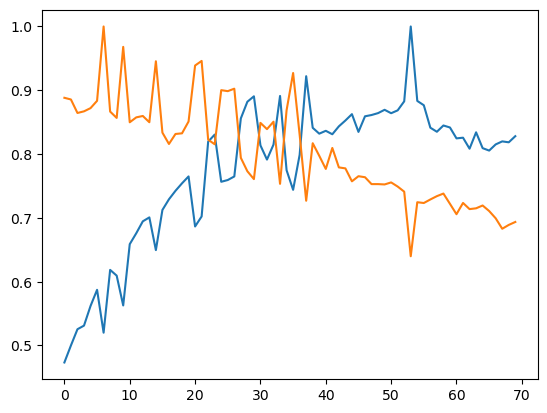

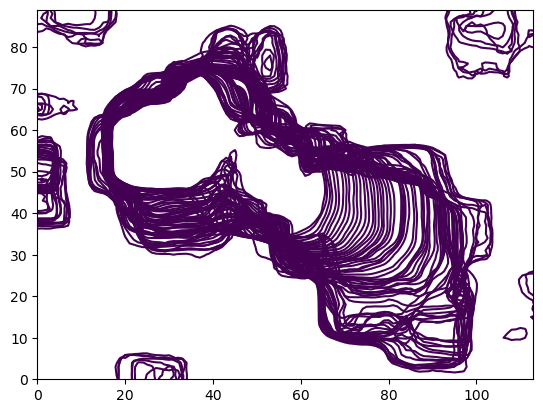

11043-----------------------------------------------------
129 155 46
b'31-Jan-2010 11:15:02.480' b'5-Feb-2010 01:39:02.470'
78 116


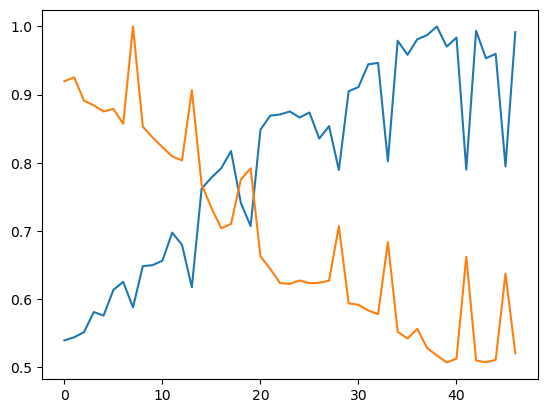

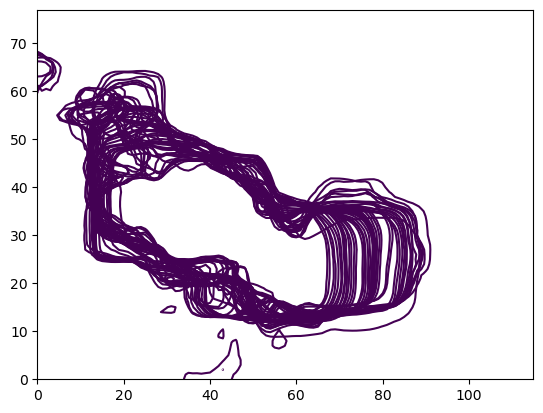

8056-----------------------------------------------------
123 133 32
b'24-Jun-1997 16:00:05.380' b'26-Jun-1997 19:12:05.340'
67 97


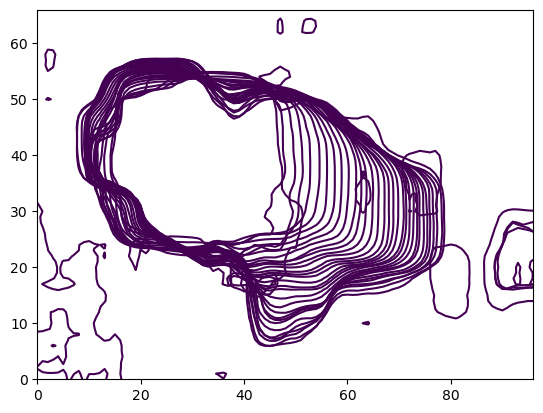

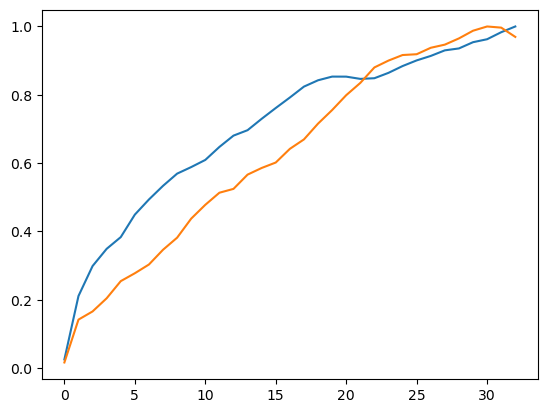

8060-----------------------------------------------------
119 147 46
b'7-Jul-1997 14:24:04.080' b'10-Jul-1997 17:36:03.990'
66 80


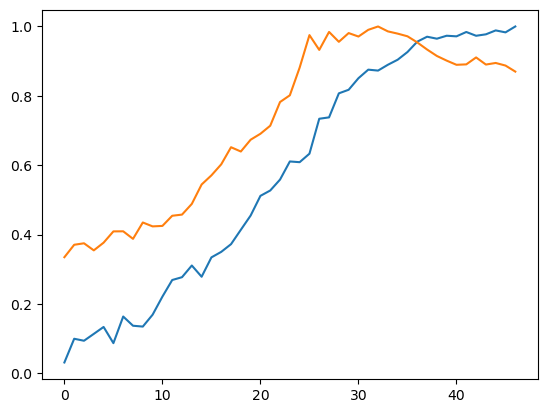

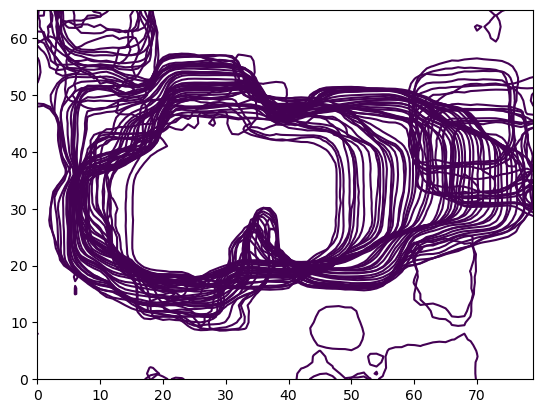

8088-----------------------------------------------------
149 207 54
b'23-Sep-1997 11:15:03.300' b'27-Sep-1997 03:15:03.340'
87 170


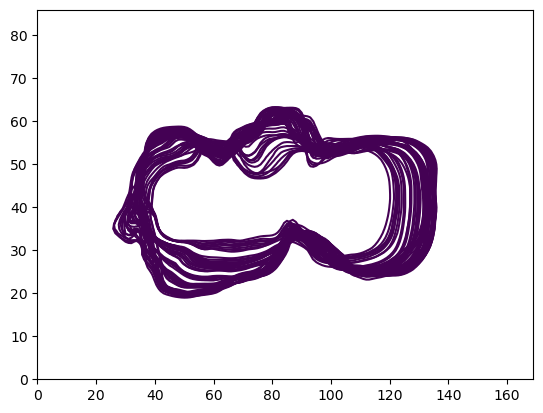

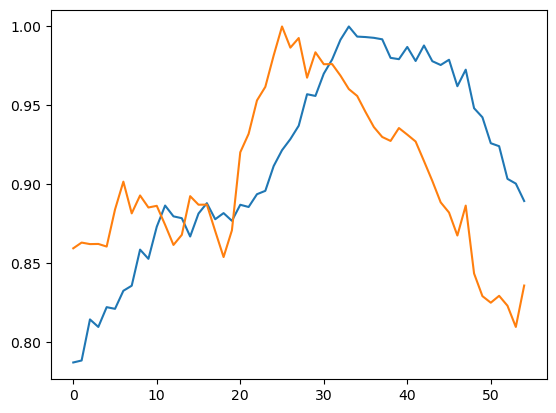

8122-----------------------------------------------------
167 171 39
b'11-Dec-1997 00:03:04.391' b'13-Dec-1997 20:48:04.341'
84 109


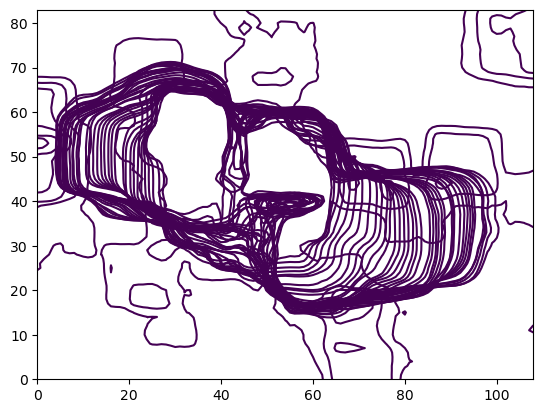

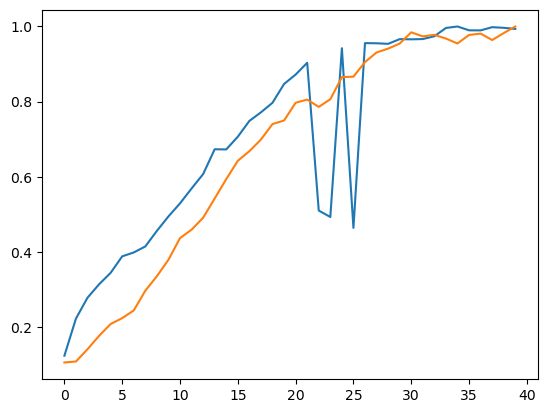

8130-----------------------------------------------------
155 199 57
b'30-Dec-1997 06:27:03.980' b'3-Jan-1998 03:11:03.870'
56 87


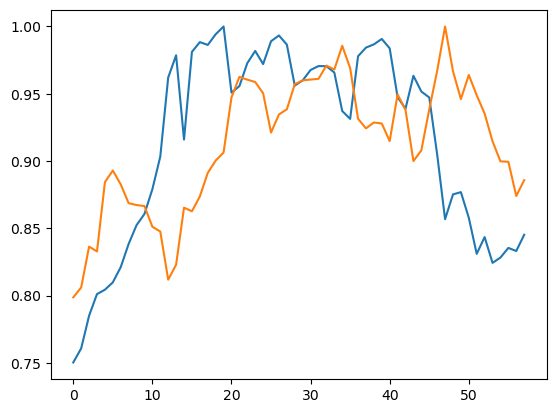

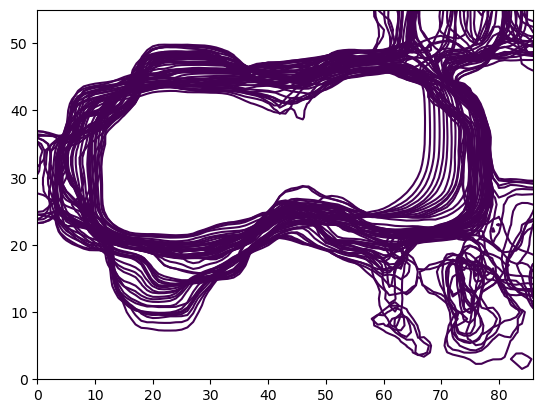

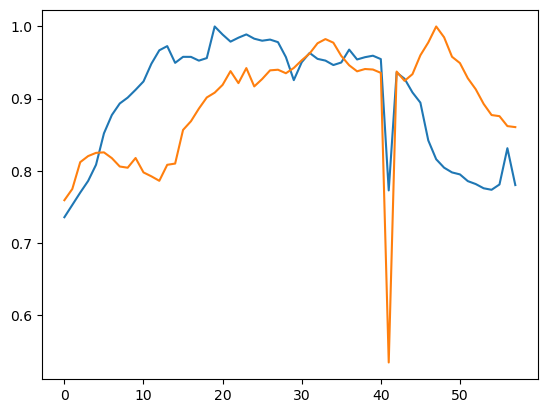

8164-----------------------------------------------------
143 129 57
b'23-Feb-1998 11:12:03.150' b'27-Feb-1998 06:24:03.160'
77 101


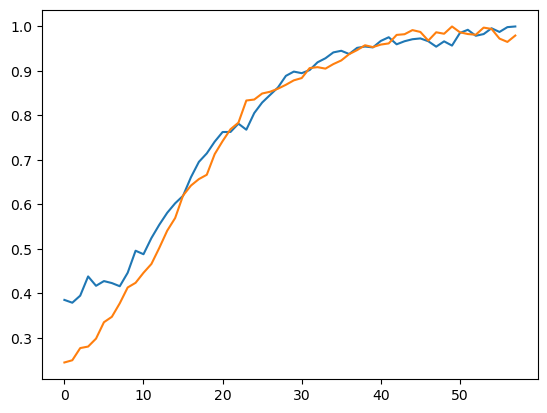

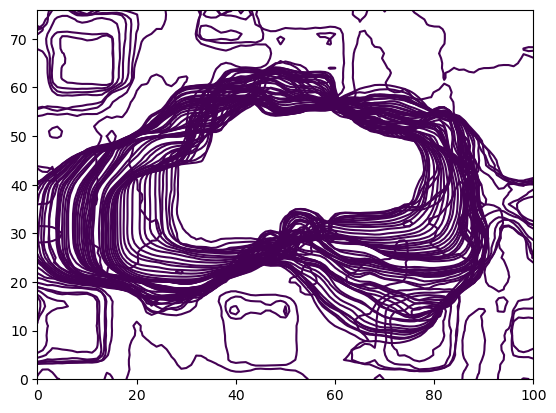

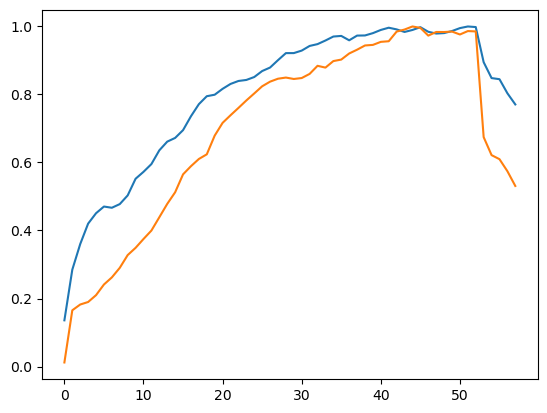

8167-----------------------------------------------------
165 159 45
b'24-Feb-1998 11:12:03.150' b'27-Feb-1998 14:24:03.160'
69 79


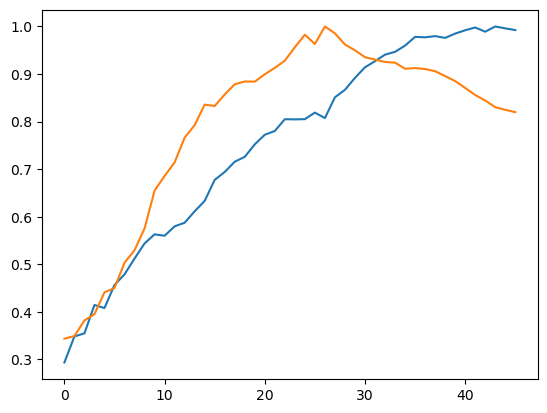

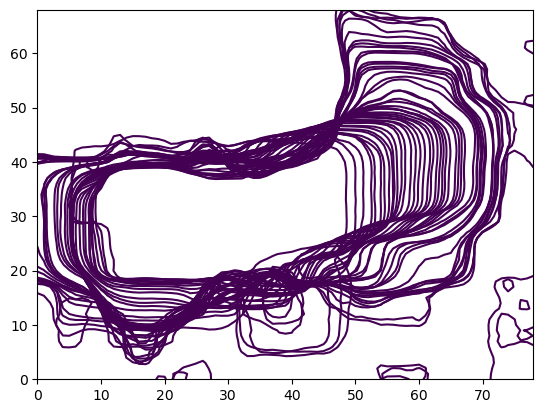

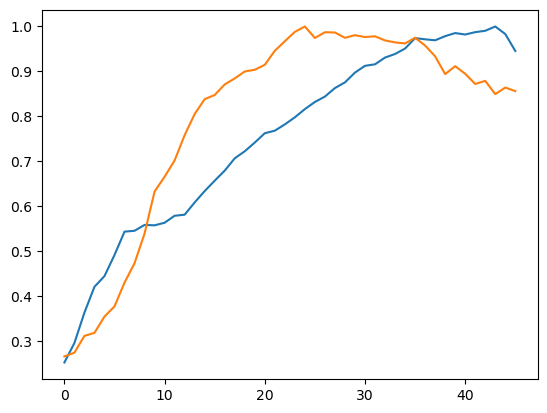

8171-----------------------------------------------------
125 147 39
b'27-Feb-1998 20:48:03.160' b'2-Mar-1998 11:12:03.160'
73 128


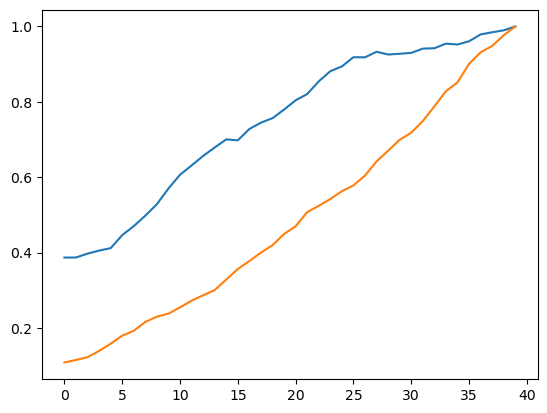

8214-----------------------------------------------------
167 235 63
b'2-May-1998 08:00:04.349' b'6-May-1998 12:47:44.000'
103 209


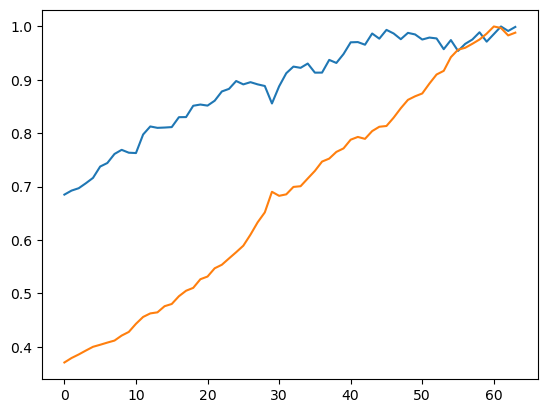

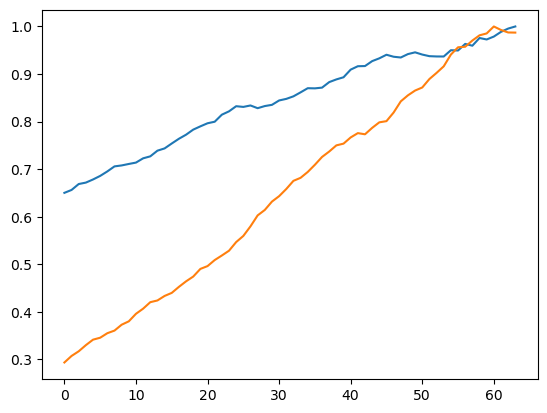

8226-----------------------------------------------------
135 165 34
b'22-May-1998 22:23:04.636' b'25-May-1998 04:51:04.642'
79 111


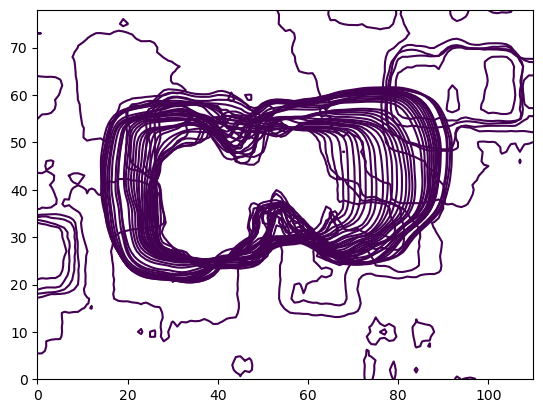

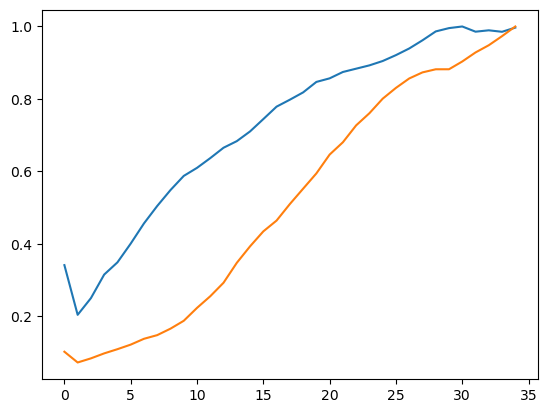

8476-----------------------------------------------------
155 187 48
b'1-Mar-1999 01:35:02.160' b'4-Mar-1999 06:27:02.183'
102 160


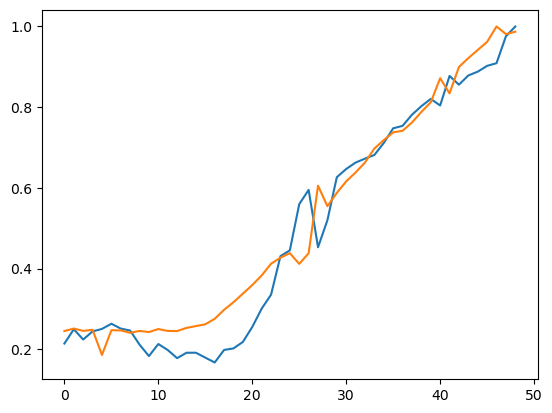

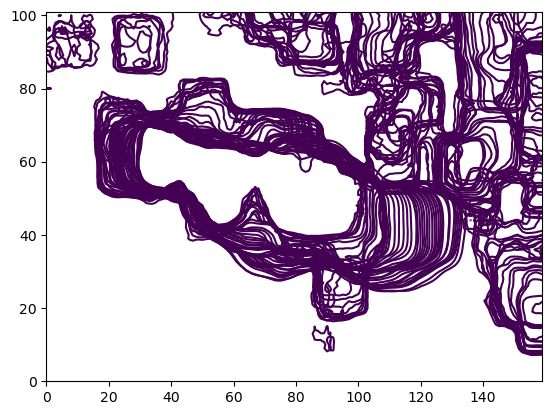

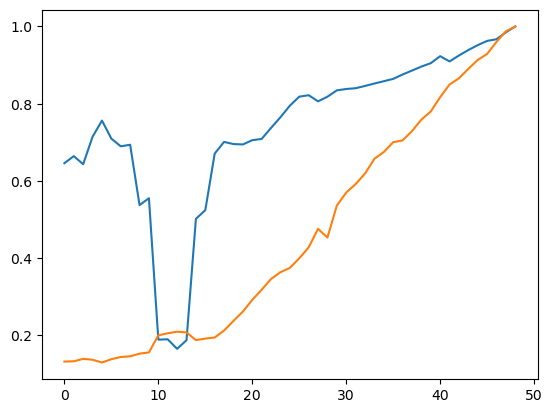

8582-----------------------------------------------------
149 173 68
b'12-Jun-1999 04:48:03.255' b'16-Jun-1999 17:36:03.139'
64 114


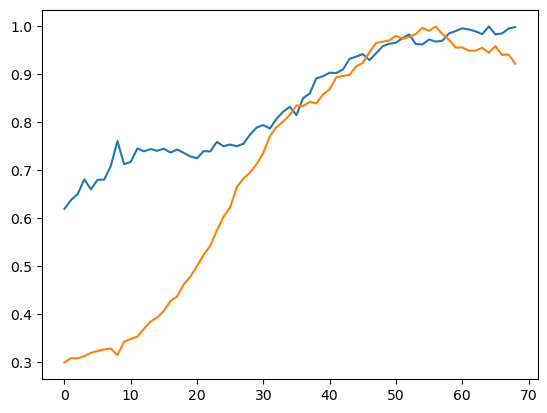

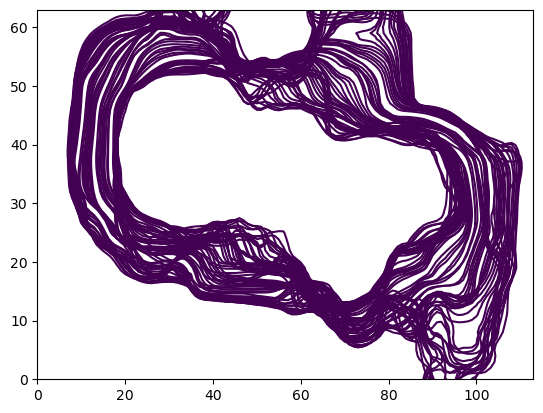

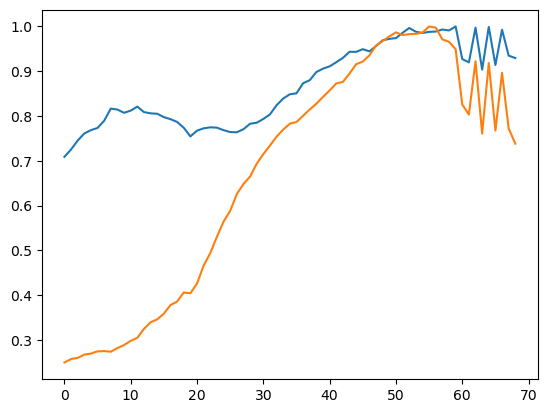

8614-----------------------------------------------------
161 183 65
b'4-Jul-1999 17:35:02.663' b'9-Jul-1999 06:23:02.580'
80 114


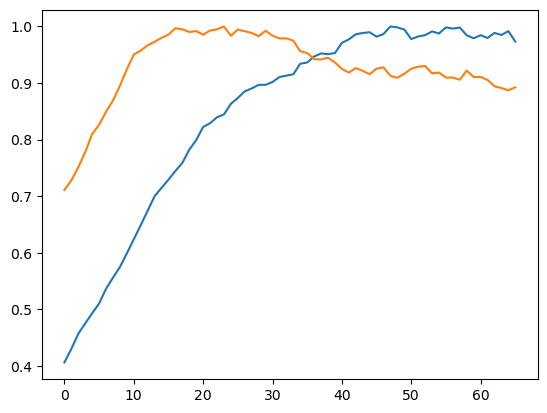

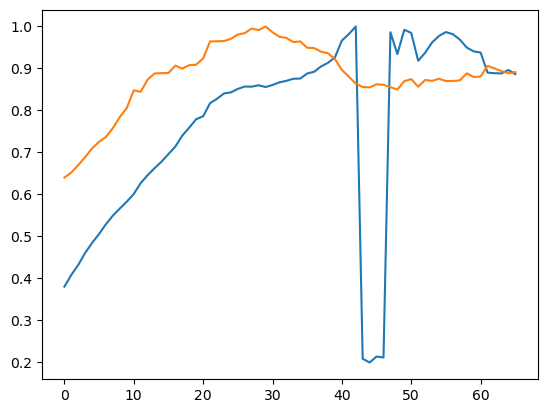

8628-----------------------------------------------------
161 205 69
b'10-Jul-1999 22:23:02.551' b'15-Jul-1999 12:48:02.470'
69 118


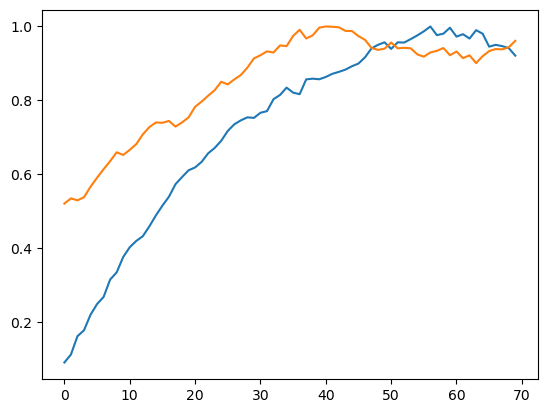

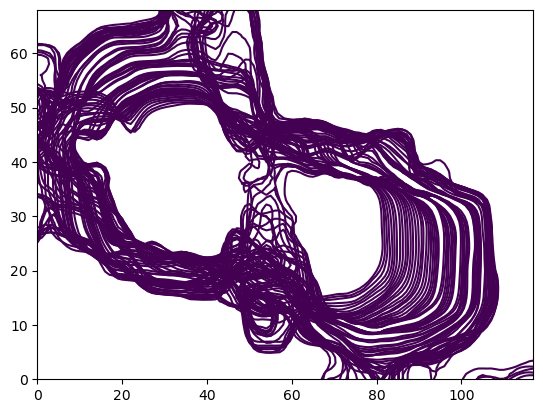

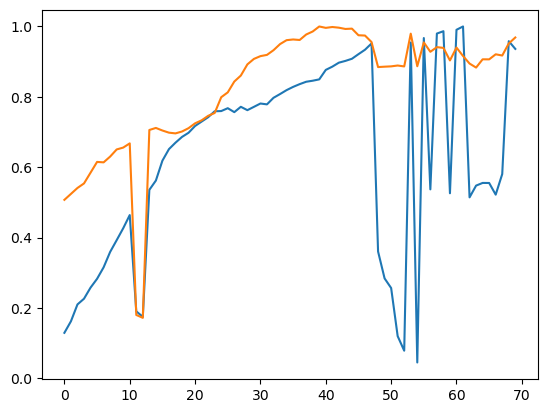

In [7]:
for name in mylist:
    
    print(name+'-----------------------------------------------------')
    datad,times=opencube2(name=name,path='../movies')
    sz2,sz1,nMagnetograms = (np.shape(datad))

    #datad=data2[::3,::3,:]
    ffp=[MFLUX(datad[:,:,j],10)[1] for j in range(nMagnetograms)]
    ffn=[MFLUX(datad[:,:,j],10)[2] for j in range(nMagnetograms)]
    ff=[MFLUX(datad[:,:,j],10)[0] for j in range(nMagnetograms)]
    pixsize=1.98*725*1000*100

    #index_max = np.max([max(range(len(ffn)), key=ffn.__getitem__),max(range(len(ffp)), key=ffp.__getitem__)])
    index_max=nMagnetograms
    #index_max=41
    datad=datad[:,:,0:index_max]
    sz2,sz1,nMagnetograms = (np.shape(datad))

    bb = [barys(np.abs(datad[:,:,i]),0) for i in range(nMagnetograms)]
    xc1=[bb[i][0] for i in range(nMagnetograms)]
    yc1=[bb[i][1] for i in range(nMagnetograms)]



    fmax=np.sum(np.abs(datad[:,:,-1])*(datad[:,:,-1] < 0))
    
    SAR = [tilt(datad[:,:,i],10)[1]/pixsize for i in range(nMagnetograms)]
    plt.plot(SAR/np.max(SAR))
    plt.plot(ff[0:]/np.max(ff))    
    plt.show()
    
    
    mask_cube=np.zeros_like(datad)
    mask2=np.zeros_like(datad)

    for j in range(nMagnetograms):

        mapi=ndimage.uniform_filter(np.abs(datad[:,:,j]), size=np.max([SAR[j]/2,15]))


        cs = plt.contour(mapi,levels=[np.max(mapi)*0.12]) #setting threshold to 12%

        mask=[]

      #  mask2[:,:,j]=(mapi >= np.max(mapi)*0.1)


        for item in cs.collections:
            for i in item.get_paths():
                v = i.vertices
                x = np.array(v[:, 0],dtype='int')
                y = np.array(v[:, 1],dtype='int')
                mask0=np.zeros_like(mapi)
                mask0[y.min():y.max(),x.min():x.max()] = 1
                mask.append(mask0)

        ff=np.sum(mask[:]*mapi,axis=(1,2))
        index_max = max(range(len(ff)), key=ff.__getitem__)

        mask_cube[:,:,j]=mask[index_max]
        mask2[:,:,j]=(mapi >= np.max(mapi)*0.1)*mask[index_max]  
        
    SAR2 = [tilt(mask2[:,:,i]*datad[:,:,i],10)[1]/pixsize for i in range(nMagnetograms)]   
    ff2=[MFLUX(mask2[:,:,j]*datad[:,:,j],10)[0] for j in range(nMagnetograms)]
    plt.show()
 
    plt.plot(SAR2/np.max(SAR2))
    plt.plot(ff2[0:]/np.max(ff2))    
    plt.show()   

In [443]:
SAR = [tilt(datad[:,:,i],10)[1]/pixsize for i in range(nMagnetograms)]
plt.plot(SAR)

In [444]:
plt.plot(ff[0:])

# Mask data spatially

Here we use a new way to constrain the flux of the AR at each time. The box defined with the following steps:
1 - Take absolute value of the magnetogram.
2 - Apply a uniform filter with box size of 10x10 pixels.
3 - Find contours of this map in which field is over 18% of maximum value of field.
4 - Select contour with biggest flux.
5 - Take max and min values of x and y coordinates of the selected contour to define a rectangular box.

Input: Data cube.
Output: mask_cube

18% threshold can be modified if needed


In [445]:
mask_cube=np.zeros_like(datad)
mask2=np.zeros_like(datad)

for j in range(nMagnetograms):

    mapi=ndimage.uniform_filter(np.abs(datad[:,:,j]), size=np.max([SAR[j]/2,15]))


    cs = plt.contour(mapi,levels=[np.max(mapi)*0.12]) #setting threshold to 12%

    mask=[]
    
  #  mask2[:,:,j]=(mapi >= np.max(mapi)*0.1)
    

    for item in cs.collections:
        for i in item.get_paths():
            v = i.vertices
            x = np.array(v[:, 0],dtype='int')
            y = np.array(v[:, 1],dtype='int')
            mask0=np.zeros_like(mapi)
            mask0[y.min():y.max(),x.min():x.max()] = 1
            mask.append(mask0)

    ff=np.sum(mask[:]*mapi,axis=(1,2))
    index_max = max(range(len(ff)), key=ff.__getitem__)

    mask_cube[:,:,j]=mask[index_max]
    mask2[:,:,j]=(mapi >= np.max(mapi)*0.1)*mask[index_max]    
#mask_cube[:,:,3]=mask_cube[:,:,4]
        


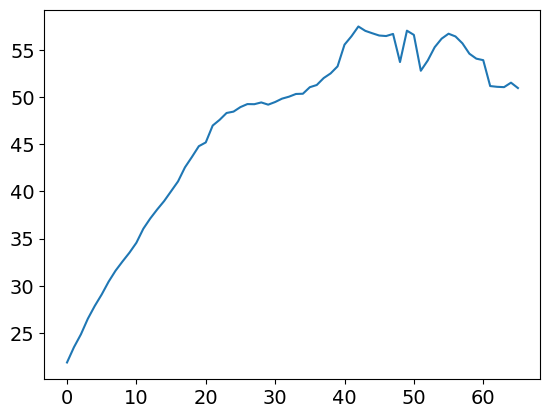

In [460]:
SAR = [tilt(mask2[:,:,i]*datad[:,:,i],10)[1]/pixsize for i in range(nMagnetograms)]
plt.plot(SAR)

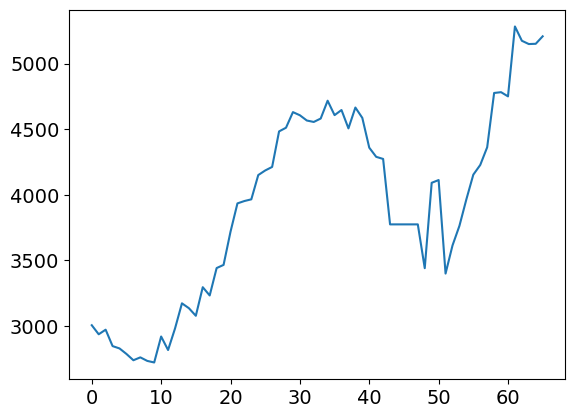

In [461]:
plt.plot(np.sum(mask2,axis=(0,1)))

In [396]:
ffn=np.sum(mask2,axis=(0,1))
index_min = np.min(min(range(len(ffn)), key=ffn.__getitem__))
index_min=3

if index_min > 0:
    for i in range(index_min):
        mask2[:,:,i]=mask2[:,:,index_min]

# Plot masked and Unmasked magnetograms

In [269]:
import matplotlib.animation as animation
#animation.rcParams['animation.writer'] = 'ffmpeg'
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['animation.ffmpeg_path'] = u'/home/mpoisson/anaconda3/bin/ffmpeg'   

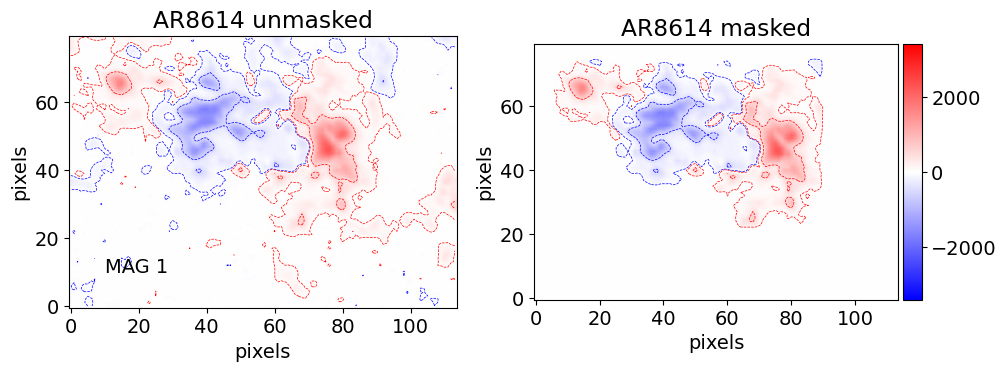

In [462]:

plt.rcParams.update({'font.size':14})

#def compmovie(a=None,b=None,label1=None,label2=None,cad=None):


a=[]
b=[]
t1=[]

for i in range(nMagnetograms):
    j=0
    while j < 2:
        a.append(datad[:,:,i])
        b.append(mask2[:,:,i]*datad[:,:,i])
        t1.append(i+1)
        j += 1

a=np.transpose(np.array(a),axes=(1,2,0))
b=np.transpose(np.array(b),axes=(1,2,0))
label1='AR'+name+' unmasked'
label2='AR'+name+' masked'

frame = 0

f,[ax1,ax2]=plt.subplots(figsize=(11,5),ncols=2,nrows=1)

mm=np.max(b)

im1=ax1.imshow(a[:,:,frame],origin='lower',interpolation='bilinear',
              cmap='bwr',vmin=-mm,vmax=mm,label=label1)

im2=ax2.imshow(b[:,:,frame],origin='lower',interpolation='bilinear',
              cmap='bwr',vmin=-mm,vmax=mm,label=label1)

c1=ax1.contour(a[:,:,frame],levels=[-500,-50,50,500],colors=['b','b','r','r'],
        linewidths=0.5,
        linestyles='dashed')

c2=ax2.contour(b[:,:,frame],levels=[-500,-50,50,500],colors=['b','b','r','r'],
                     linewidths=0.5,
                linestyles='dashed')

ax1.set_title(label1)
ax2.set_title(label2)

ax1.set_ylabel('pixels')
ax2.set_ylabel('pixels')

ax1.set_xlabel('pixels')
ax2.set_xlabel('pixels')

divider = make_axes_locatable(ax2)

tt=ax1.text(10,10,'MAG '+str(t1[frame]))

cax = divider.append_axes('right', size='5%', pad=0.05)

f.colorbar(im2, cax=cax, orientation='vertical')
    
    
def update(*args):
    global frame,c1,c2,cad,a,b,t1
    
    im1.set_array(a[:,:,frame])
    im2.set_array(b[:,:,frame])

    for h in c1.collections:
        h.remove()
    for h in c2.collections:
        h.remove()
        
    c1=ax1.contour(a[:,:,frame],levels=[-500,-50,50,500],colors=['b','b','r','r'],
            linewidths=0.5,
            linestyles='dashed')
    
    c2=ax2.contour(b[:,:,frame],levels=[-500,-50,50,500],colors=['b','b','r','r'],
            linewidths=0.5,
            linestyles='dashed')

    tt.set_text('MAG '+str(t1[frame]))

    frame += 1
    frame %= nMagnetograms*2

    return im1,im2,c1,c2,tt

ani = animation.FuncAnimation(f, update, np.shape(a)[2], blit=False, interval=100,
                              repeat=False, save_count=150)

writervideo = animation.FFMpegWriter(fps=5)

#ani.save('./'+name+'/'+label1+'.mp4',writer=writervideo,dpi=300)

In [463]:
HTML(ani.to_html5_video())

# Plot masked and unmasked parameters

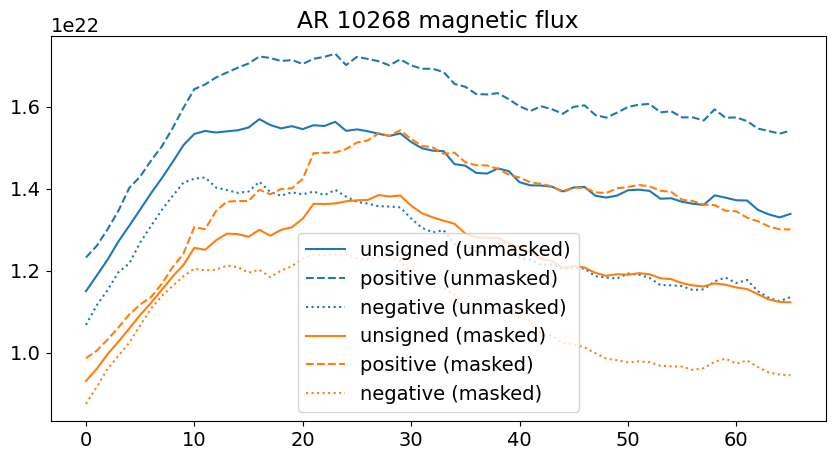

In [465]:
# AR MAGNETIC FLUX
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize

plt.figure(figsize=(10,5))

plt.plot(pixarea*np.sum(np.abs(datad),axis=(0,1))/2,label='unsigned (unmasked)',color='tab:blue')
plt.plot(pixarea*np.sum(np.abs(datad*(datad > 0)),axis=(0,1)),label='positive (unmasked)',color='tab:blue',linestyle='dashed')
plt.plot(pixarea*np.sum(np.abs(datad*(datad < 0)),axis=(0,1)),label='negative (unmasked)',color='tab:blue',linestyle='dotted')

plt.plot(pixarea*np.sum(np.abs(mask2*datad),axis=(0,1))/2,label='unsigned (masked)',color='tab:orange')
plt.plot(pixarea*np.sum(np.abs(mask2*datad*(datad > 0)),axis=(0,1)),label='positive (masked)',color='tab:orange',linestyle='dashed')
plt.plot(pixarea*np.sum(np.abs(mask2*datad*(datad < 0)),axis=(0,1)),label='negative (masked)',color='tab:orange',linestyle='dotted')


plt.title('AR 10268 magnetic flux')
plt.legend()


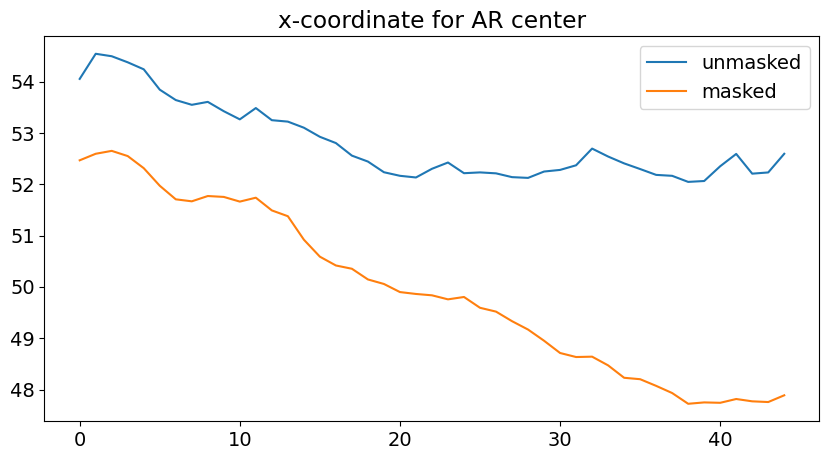

In [298]:
data2=mask2*datad
bb = [barys(np.abs(data2[:,:,i]),0) for i in range(nMagnetograms)]
xc2=[bb[i][0] for i in range(nMagnetograms)]
yc2=[bb[i][1] for i in range(nMagnetograms)]



plt.figure(figsize=(10,5))

plt.plot(xc1,label='unmasked')
plt.plot(xc2,label='masked')

plt.legend()
plt.title('x-coordinate for AR center')
plt.show()

plt.figure(figsize=(10,5))

plt.plot(yc1,label='unmasked')
plt.plot(yc2,label='masked')

plt.legend()
plt.title('y-coordinate for AR center')
plt.show()

In [466]:
mask2=mask2[:,:,0:40]

In [464]:

for i in range(35,nMagnetograms):
    mask2[:,:,i]=mask2[:,:,35]

In [239]:
mask2[:,:,42]=mask2[:,:,43]

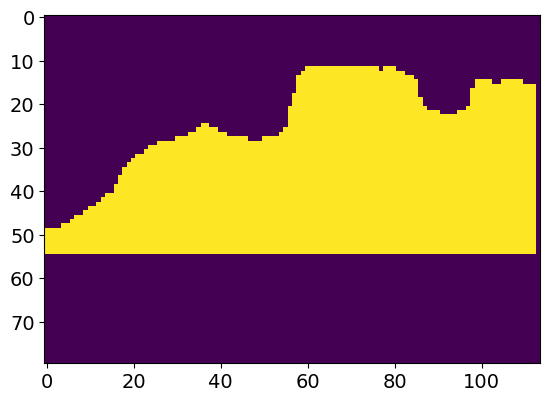

In [458]:
plt.imshow(mask2[:,:,48])

In [431]:
for i in range(2):
    mask_cube[:,:,i]=mask_cube[:,:,2]

In [467]:
np.save('./'+name+'/'+name+'_mask2.npy',mask2)
